<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/pc_on_fundamental_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
import numpy as np
df=pd.read_csv('/content/nifty50f.csv')

In [34]:
df.head(2)

,Name,CMP,ROE %,P/E,CMP / Sales,Debt / Eq,Earnings Yield %,Mar Cap Rs.Cr.,CMP / BV,ROCE %,OPM %,ROE 5Yr %,Current ratio,Inven TO,OP 12M Rs.Cr.,Sales Rs.Cr.,Sales growth %
0,Reliance Industr,2987.25,8.94,28.92,2.30,0.42,5.47,2021079.46,2.69,9.14,18.02,8.94,1.16,4.95,158073.0,877365.0,0.57
1,TCS,4052.10,46.92,32.16,6.14,0.08,4.27,1466085.24,14.56,58.67,26.34,40.61,2.71,1.54,62906.0,238818.0,10.11


In [35]:
# Set the index to the 'Name' column
df = df.set_index('Name')

In [36]:
df.head(2)

,CMP,ROE %,P/E,CMP / Sales,Debt / Eq,Earnings Yield %,Mar Cap Rs.Cr.,CMP / BV,ROCE %,OPM %,ROE 5Yr %,Current ratio,Inven TO,OP 12M Rs.Cr.,Sales Rs.Cr.,Sales growth %
Name,,,,,,,,,,,,,,,,
Reliance Industr,2987.25,8.94,28.92,2.30,0.42,5.47,2021079.46,2.69,9.14,18.02,8.94,1.16,4.95,158073.0,877365.0,0.57
TCS,4052.10,46.92,32.16,6.14,0.08,4.27,1466085.24,14.56,58.67,26.34,40.61,2.71,1.54,62906.0,238818.0,10.11


In [37]:
# Select relevant fundamental data columns
features = ['ROE\xa0%','P/E','CMP / Sales','Debt / Eq','Earnings Yield\xa0%','CMP / BV','ROCE\xa0%','OPM\xa0%','Current ratio',
 'Inven TO','Sales growth\xa0%']


In [38]:
X=df[features]

In [39]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0.01))

In [40]:
# Create PCA object (reduce dimensions to 2 for easier visualization)
pca = PCA(n_components=2)

# Fit PCA to the standardized data
principal_components = pca.fit_transform(X_scaled)

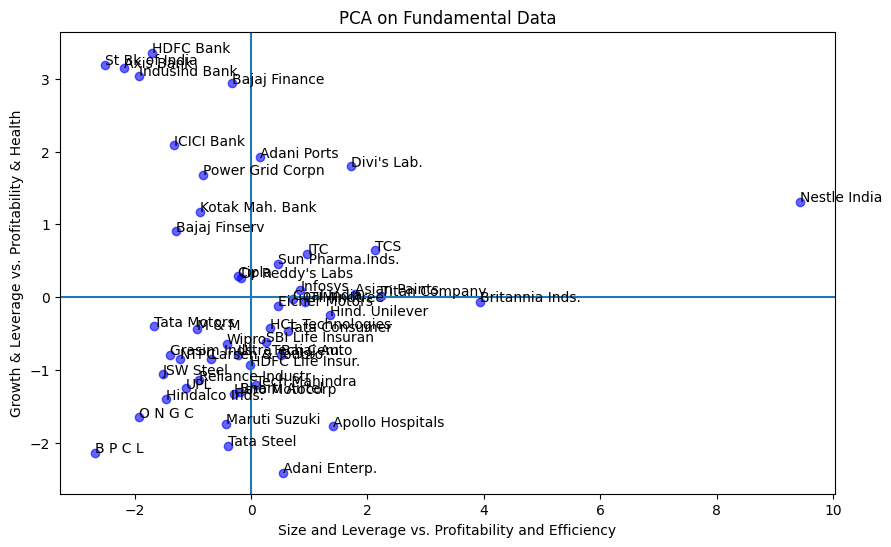

In [41]:
# Create DataFrame for easy visualization
principal_df = pd.DataFrame(data=principal_components,
                            columns=['PC1', 'PC2'],
                            index=df.index)

# Plot the results (Customize plot appearance as needed)
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', alpha = 0.6)
plt.xlabel('Size and Leverage vs. Profitability and Efficiency')
plt.ylabel('Growth & Leverage vs. Profitability & Health')
plt.title('PCA on Fundamental Data')
plt.axhline(y=0)
plt.axvline(x=0)
# Labels for companies
for i, txt in enumerate(df.index):
    plt.annotate(txt, (principal_df['PC1'].iloc[i], principal_df['PC2'].iloc[i]))

plt.show()


In [42]:
# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[-0.89468917 -1.14405534]
 [ 2.13124229  0.64330593]
 [-1.70404035  3.35729921]
 [-1.33219344  2.08632103]
 [ 0.84667442  0.09165107]
 [-2.50634507  3.19333405]
 [-0.18618458 -1.30986644]
 [ 1.35776911 -0.24833002]
 [ 0.96520019  0.59677116]
 [-0.68892617 -0.84859505]
 [ 0.31833057 -0.43073842]
 [-0.32422452  2.93999731]
 [ 0.4641339   0.45994064]
 [ 0.5492639  -2.41325561]
 [-0.4379605  -1.73925716]
 [-1.66634529 -0.40329004]
 [-0.88148054  1.17295585]
 [-1.92231244 -1.64964259]
 [-2.1859737   3.15067688]
 [ 2.23156774  0.01722555]
 [-1.22543311 -0.84609267]
 [-0.22701248 -0.79358498]
 [ 1.78916986  0.0450213 ]
 [ 0.15356176  1.92251582]
 [-0.41571217 -0.63796878]
 [ 0.71505402 -0.02701785]
 [-0.82807198  1.68266153]
 [-1.29627316  0.90527595]
 [ 9.42615718  1.31155472]
 [-0.93159809 -0.43830005]
 [ 0.50845205 -0.79200353]
 [-1.51462017 -1.05928421]
 [-0.39897059 -2.04082796]
 [ 0.92353592 -0.06158582]
 [ 0.25945526 -0.61153208]
 [-1.39975439 -0.79395665]
 [-2.6

In [43]:
df.columns

Index(['CMP', 'ROE %', 'P/E', 'CMP / Sales', 'Debt / Eq', 'Earnings Yield %',
       'Mar Cap Rs.Cr.', 'CMP / BV', 'ROCE %', 'OPM %', 'ROE 5Yr %',
       'Current ratio', 'Inven TO', 'OP 12M Rs.Cr.', 'Sales Rs.Cr.',
       'Sales growth %'],
      dtype='object')

In [44]:
df.index


Index(['Reliance Industr', 'TCS', 'HDFC Bank', 'ICICI Bank', 'Infosys',
       'St Bk of India', 'Bharti Airtel', 'Hind. Unilever', 'ITC',
       'Larsen & Toubro', 'HCL Technologies', 'Bajaj Finance',
       'Sun Pharma.Inds.', 'Adani Enterp.', 'Maruti Suzuki', 'Tata Motors',
       'Kotak Mah. Bank', 'O N G C', 'Axis Bank', 'Titan Company', 'NTPC',
       'UltraTech Cem.', 'Asian Paints', 'Adani Ports', 'Wipro', 'Coal India',
       'Power Grid Corpn', 'Bajaj Finserv', 'Nestle India', 'M & M',
       'Bajaj Auto', 'JSW Steel', 'Tata Steel', 'LTIMindtree',
       'SBI Life Insuran', 'Grasim Inds', 'B P C L', 'Tech Mahindra',
       'HDFC Life Insur.', 'Britannia Inds.', 'Cipla', 'Hindalco Inds.',
       'IndusInd Bank', 'Tata Consumer', 'Eicher Motors', 'Dr Reddy's Labs',
       'Apollo Hospitals', 'Divi's Lab.', 'Hero Motocorp', 'UPL'],
      dtype='object', name='Name')

In [45]:
from sklearn.decomposition import PCA

# Assuming you already have your PCA model created and fitted as 'pca'
loadings = pca.components_
print('principal components loadings')
print(loadings)


principal components loadings
[[ 0.44735945  0.29648622  0.36769785 -0.22606468 -0.25910763  0.48442023
   0.45761239 -0.08604157  0.0217552   0.03550355 -0.07288851]
 [ 0.14487394 -0.18763515  0.29066867  0.45173414 -0.08104606  0.04923464
   0.03794209  0.51237458  0.34859793 -0.34636935  0.37523395]]


In [46]:
import pandas as pd

pc_rankings = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=df.index)
pc_rankings['PC1 Rank'] = pc_rankings['PC1'].rank(ascending=False)
pc_rankings['PC2 Rank'] = pc_rankings['PC2'].rank(ascending=False)
print(pc_rankings)


                       PC1       PC2  PC1 Rank  PC2 Rank
Name                                                    
Reliance Industr -0.894689 -1.144055      35.0      39.0
TCS               2.131242  0.643306       4.0      13.0
HDFC Bank        -1.704040  3.357299      45.0       1.0
ICICI Bank       -1.332193  2.086321      40.0       6.0
Infosys           0.846674  0.091651      11.0      18.0
St Bk of India   -2.506345  3.193334      49.0       2.0
Bharti Airtel    -0.186185 -1.309866      24.0      42.0
Hind. Unilever    1.357769 -0.248330       8.0      25.0
ITC               0.965200  0.596771       9.0      14.0
Larsen & Toubro  -0.688926 -0.848595      32.0      36.0
HCL Technologies  0.318331 -0.430738      18.0      27.0
Bajaj Finance    -0.324225  2.939997      28.0       5.0
Sun Pharma.Inds.  0.464134  0.459941      16.0      15.0
Adani Enterp.     0.549264 -2.413256      14.0      50.0
Maruti Suzuki    -0.437961 -1.739257      31.0      46.0
Tata Motors      -1.666345 -0.4

In [47]:
# 1. Sort by PC1 in descending order and select top 5 performers
top_by_pc1 = pc_rankings.nlargest(10, 'PC1')

# 2. Sort by PC2 in descending order
top_by_pc1 = top_by_pc1.sort_values(by='PC2', ascending=False)

# 3. Final list: companies in the top 5 by PC1 that also remain near the top by PC2
final_list = top_by_pc1.head(5)  # Assuming "near the top" means the top 1 company by PC2

# Print the final list
print(final_list)

                   PC1       PC2  PC1 Rank  PC2 Rank
Name                                                
Divi's Lab.   1.717091  1.800247       6.0       8.0
Nestle India  9.426157  1.311555       1.0      10.0
TCS           2.131242  0.643306       4.0      13.0
ITC           0.965200  0.596771       9.0      14.0
Asian Paints  1.789170  0.045021       5.0      19.0


In [48]:
top_by_pc1

,PC1,PC2,PC1 Rank,PC2 Rank
Name,,,,
Divi's Lab.,1.717091,1.800247,6.0,8.0
Nestle India,9.426157,1.311555,1.0,10.0
TCS,2.131242,0.643306,4.0,13.0
ITC,0.965200,0.596771,9.0,14.0
Asian Paints,1.789170,0.045021,5.0,19.0
Titan Company,2.231568,0.017226,3.0,20.0
Britannia Inds.,3.933316,-0.061245,2.0,22.0
LTIMindtree,0.923536,-0.061586,10.0,23.0
Hind. Unilever,1.357769,-0.248330,8.0,25.0


In [49]:
# 1. Sort by PC2 in descending order and select top 5 performers
top_by_pc2 = pc_rankings.nlargest(5, 'PC2')

# 2. Sort by PC1 in descending order
top_by_pc2 = top_by_pc2.sort_values(by='PC1', ascending=False)

# 3. Final list: companies in the top 5 by PC2 that also remain near the top by PC1
final_list = top_by_pc2.head(5)  # Assuming "near the top" means the top 1 company by PC1
# Print the final list
print(final_list)

                     PC1       PC2  PC1 Rank  PC2 Rank
Name                                                  
Bajaj Finance  -0.324225  2.939997      28.0       5.0
HDFC Bank      -1.704040  3.357299      45.0       1.0
IndusInd Bank  -1.934642  3.043582      47.0       4.0
Axis Bank      -2.185974  3.150677      48.0       3.0
St Bk of India -2.506345  3.193334      49.0       2.0


In [62]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'data'
correlation_PC2_ROE = principal_df['PC2'].corr(df['ROE\xa0%'])
correlation_PC2_PE = principal_df['PC2'].corr(df['P/E'])
correlation_PC2_DE = principal_df['PC2'].corr(df['Debt / Eq'])#,
correlation_PC2_EY = principal_df['PC2'].corr(df['Earnings Yield\xa0%'])
correlation_PC2_OPM = principal_df['PC2'].corr(df['OPM\xa0%'])#'OPM\xa0%'
correlation_PC2_Sales_Growth = principal_df['PC2'].corr(df['Sales growth\xa0%'])#'OPM\xa0%'
#'Sales growth\xa0%'
# ... and so on for other features


In [63]:
print(correlation_PC2_ROE ,correlation_PC2_PE ,correlation_PC2_DE ,correlation_PC2_EY,correlation_PC2_OPM,correlation_PC2_Sales_Growth)

0.21358496030216748 -0.3080056174933813 0.6659832454437834 -0.11948469507635451 0.7553843099134229 0.5532004418017977


In [53]:
correlation_PC1_ROE

0.8415162388604012

In [55]:
correlation_PC1_DE

-0.4252444020129131

In [57]:
correlation_PC1_EY

-0.48740063109740167

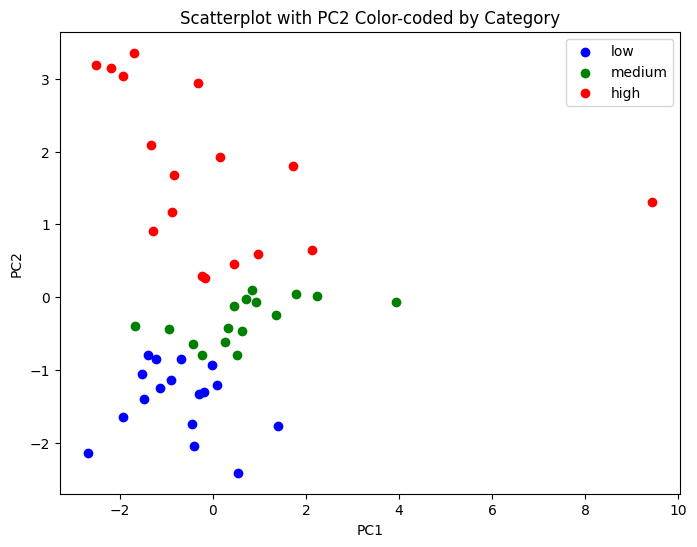

In [65]:
# Categorize PC2 scores as high, medium, or low
pc2_thresholds = {
    'low': np.percentile(principal_df['PC2'], 33.3),  # 33.3% percentile
    'medium': np.percentile(principal_df['PC2'], 66.6),  # 66.6% percentile
    'high': np.inf  # Anything above the medium threshold is high
}

def categorize_pc2(pc2_value):
    for category, threshold in pc2_thresholds.items():
        if pc2_value <= threshold:
            return category

# Add category column to DataFrame
principal_df['PC2 Category'] = principal_df['PC2'].apply(categorize_pc2)

# Color-coding dictionary
color_dict = {
    'low': 'blue',
    'medium': 'green',
    'high': 'red'
}

# Plot scatterplot with color-coded points
plt.figure(figsize=(8, 6))
for category, color in color_dict.items():
    subset = principal_df[principal_df['PC2 Category'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=category)

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot with PC2 Color-coded by Category')

# Show plot
plt.show()


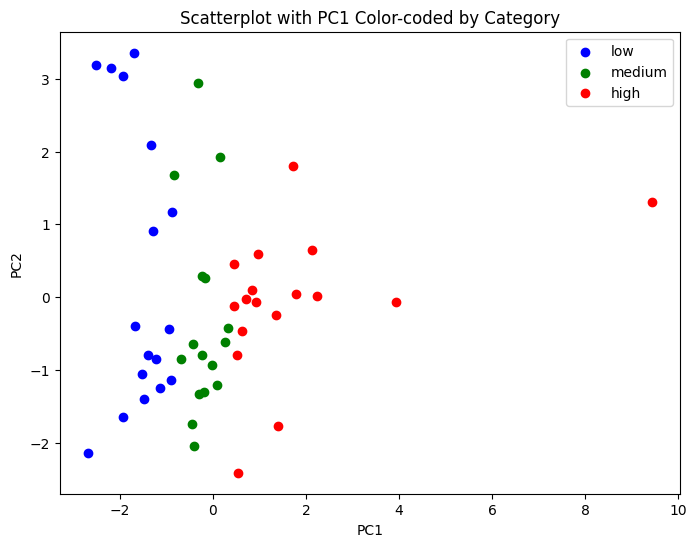

In [67]:
# Categorize PC2 scores as high, medium, or low
pc1_thresholds = {
    'low': np.percentile(principal_df['PC1'], 33.3),  # 33.3% percentile
    'medium': np.percentile(principal_df['PC1'], 66.6),  # 66.6% percentile
    'high': np.inf  # Anything above the medium threshold is high
}

def categorize_pc1(pc1_value):
    for category, threshold in pc1_thresholds.items():
        if pc1_value <= threshold:
            return category

# Add category column to DataFrame
principal_df['PC1 Category'] = principal_df['PC1'].apply(categorize_pc1)

# Color-coding dictionary
color_dict = {
    'low': 'blue',
    'medium': 'green',
    'high': 'red'
}

# Plot scatterplot with color-coded points
plt.figure(figsize=(8, 6))
for category, color in color_dict.items():
    subset = principal_df[principal_df['PC1 Category'] == category]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=category)

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot with PC1 Color-coded by Category')

# Show plot
plt.show()


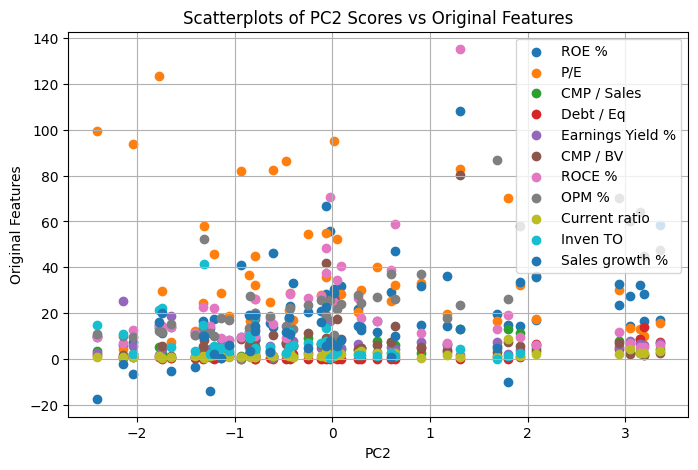

In [71]:
# Concatenate PC2 scores with original data
finalDf = pd.concat([principal_df, df], axis=1)

# Plot scatterplots
plt.figure(figsize=(8,5))
for feature in features:
    plt.scatter(finalDf['PC2'], finalDf[feature], label=feature)

# Add labels and title
plt.xlabel('PC2')
plt.ylabel('Original Features')
plt.title('Scatterplots of PC2 Scores vs Original Features')
plt.legend()
plt.grid(True)

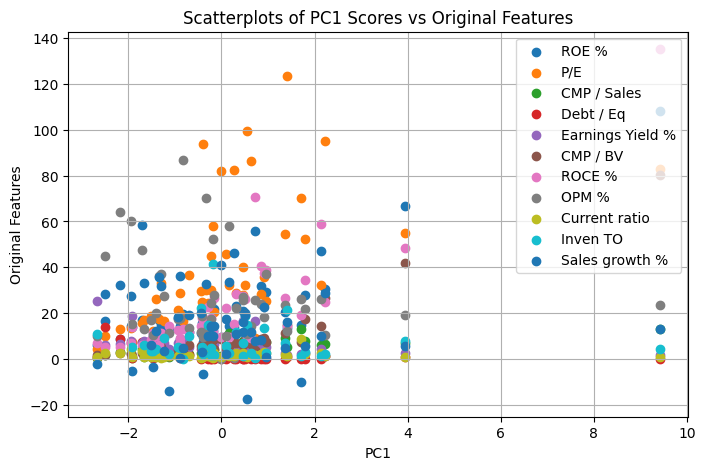

In [72]:
# Plot scatterplots
plt.figure(figsize=(8,5))
for feature in features:
    plt.scatter(finalDf['PC1'], finalDf[feature], label=feature)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Original Features')
plt.title('Scatterplots of PC1 Scores vs Original Features')
plt.legend()
plt.grid(True)